# Project Requirement 2

This notebook demonstrates the implementation of Project Requirement 2 using specialized seller class:

- Multiple products + stochastic environment + Combinatorial-UCB

Both algorithms use the project-compliant binary demand model and corrected reward calculations.

In [1]:
# Import required libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from base_classes.setting import Setting
from base_classes.environment import Environment
from base_classes.specialized_sellers import create_seller_for_requirement
from plotting import plot_environment_results

# Set random seed for reproducible results
np.random.seed(42)

print("📚 Libraries imported and environment configured")
print("🎯 Ready to run Project Requirement 2")

req2_setting = Setting(
    T=500,
    n_products=10,  # Multiple products as required
    epsilon=0.1,   # Discrete price set (5 levels)
    distribution='exponential',  # Stochastic environment
    dist_params=(50, 15),     # Distribution parameters
    verbose='no',
    non_stationary='no',      # Stochastic (stationary)
    algorithm="combinatorial_ucb"
)

# Create environment with specialized seller
env = Environment(req2_setting)

📚 Libraries imported and environment configured
🎯 Ready to run Project Requirement 2


**Configuration:**
- Multiple products (N=3)
- Stochastic environment (stationary)
- CombinatorialUCBSeller with inventory constraint
- Discrete price set with 5 levels

In [2]:
print("MULTIPLE PRODUCTS + COMBINATORIAL-UCB")
print("Inventory Constraint: ON")
print("-" * 50)

env.seller = create_seller_for_requirement(2, req2_setting, use_inventory_constraint=True)

print(f"Configuration:")
print(f"  - Products: {req2_setting.n_products}")
print(f"  - Price levels: {int(1/req2_setting.epsilon)}")
print(f"  - Environment: Stochastic (stationary)")
print(f"  - Seller: {env.seller.__class__.__name__}")
print(f"  - Budget constraint: {req2_setting.B:.2f}")

# Run experiment
print(f"\nRunning experiment...")
env.play_all_rounds()

# Calculate results
constraint_rewards = np.array(env.seller.history_rewards)
constraint_regrets = env.optimal_rewards - constraint_rewards
constraint_cum_regret = np.cumsum(constraint_regrets)
constraint_optimals = np.array(env.optimal_rewards)

print(f"   Final cumulative regret: {constraint_cum_regret[-1]:.2f}")
print(f"   Total rewards: {np.sum(constraint_rewards):.2f}")
print(f"   Efficiency: {(np.sum(constraint_rewards)/np.sum(env.optimal_rewards)*100):.1f}%")

MULTIPLE PRODUCTS + COMBINATORIAL-UCB
Inventory Constraint: ON
--------------------------------------------------
Configuration:
  - Products: 10
  - Price levels: 10
  - Environment: Stochastic (stationary)
  - Seller: CombinatorialUCBSeller
  - Budget constraint: 13.75

Running experiment...
   Final cumulative regret: 2628.00
   Total rewards: 2194.80
   Efficiency: 45.5%


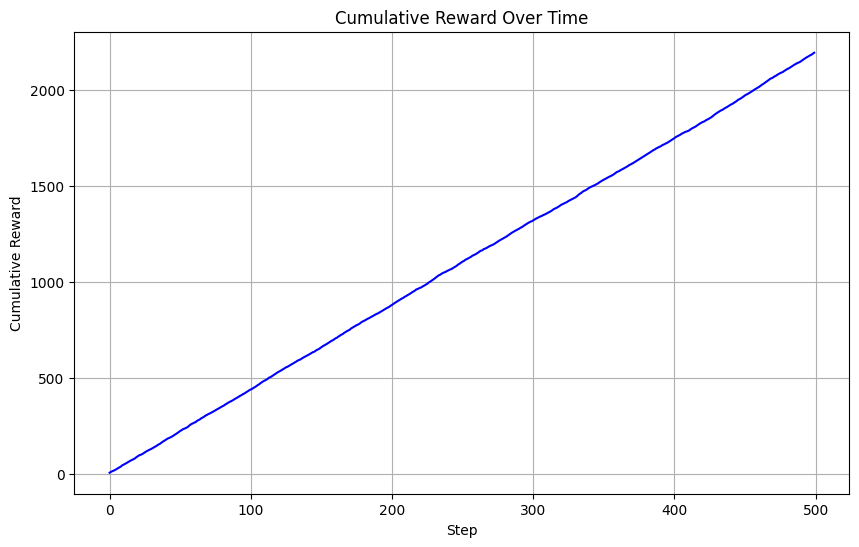

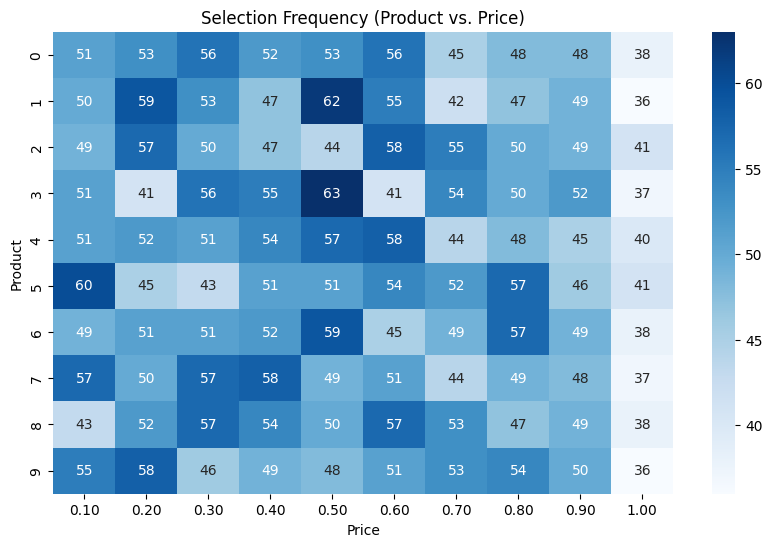

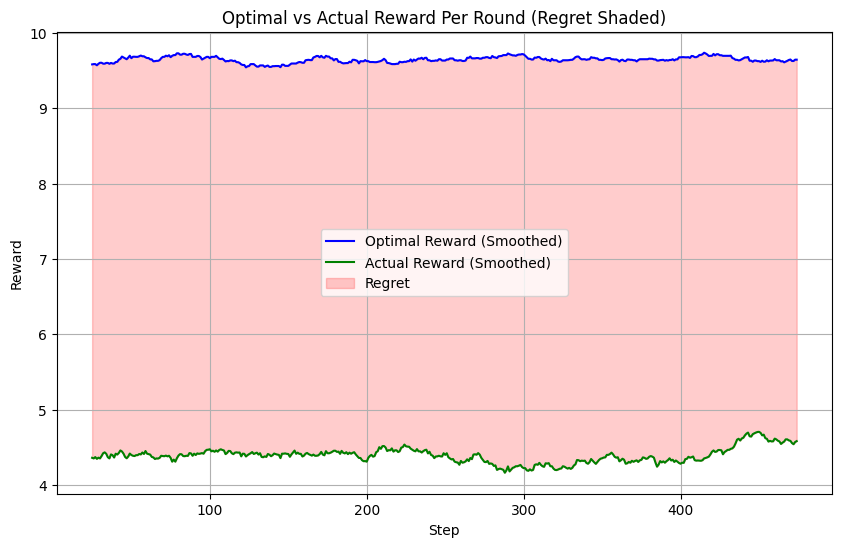

/Users/frain/Documents/GitHub/ola-proj-2425/project_work/plotting.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


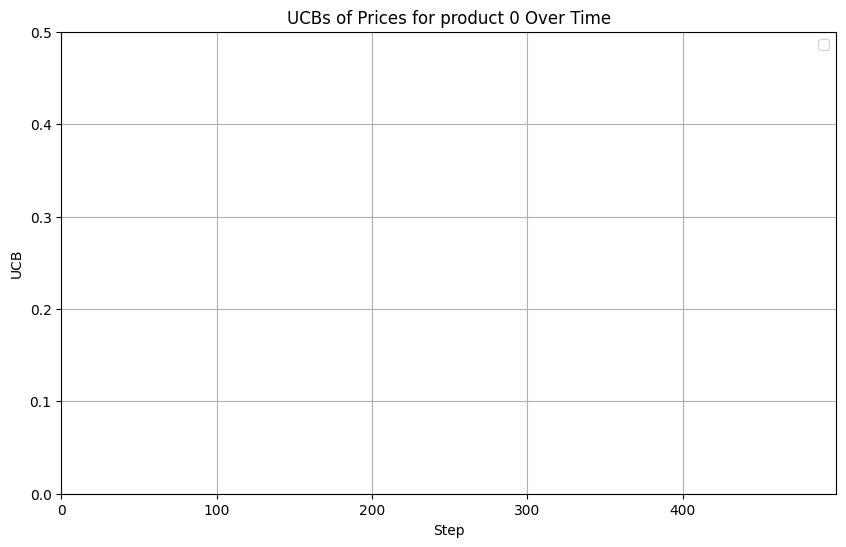

In [3]:
plot_environment_results(env)

**Configuration:**
- Multiple products (N=3)
- Stochastic environment (stationary)
- CombinatorialUCBSeller with no inventory constraint
- Discrete price set with 5 levels

In [4]:
env.reset()  # Reset environment for next run
print("MULTIPLE PRODUCTS + COMBINATORIAL-UCB")
print("Inventory Constraint: OFF")
print("-" * 50)

env.seller = create_seller_for_requirement(2, req2_setting, use_inventory_constraint=False)

print(f"Configuration:")
print(f"  - Products: {req2_setting.n_products}")
print(f"  - Price levels: {int(1/req2_setting.epsilon)}")
print(f"  - Environment: Stochastic (stationary)")
print(f"  - Seller: {env.seller.__class__.__name__}")
print(f"  - Budget constraint: {req2_setting.B:.2f}")

# Run experiment
print(f"\nRunning experiment...")
env.play_all_rounds()

# Calculate results
noconstraint_rewards = np.array(env.seller.history_rewards)
noconstraint_regrets = env.optimal_rewards - noconstraint_rewards
noconstraint_cum_regret = np.cumsum(noconstraint_regrets)
noconstraint_optimals = np.array(env.optimal_rewards)

print(f"   Final cumulative regret: {noconstraint_cum_regret[-1]:.2f}")
print(f"   Total rewards: {np.sum(noconstraint_rewards):.2f}")
print(f"   Efficiency: {(np.sum(noconstraint_rewards)/np.sum(env.optimal_rewards)*100):.1f}%")

MULTIPLE PRODUCTS + COMBINATORIAL-UCB
Inventory Constraint: OFF
--------------------------------------------------
Configuration:
  - Products: 10
  - Price levels: 10
  - Environment: Stochastic (stationary)
  - Seller: CombinatorialUCBSeller
  - Budget constraint: 13.75

Running experiment...
   Final cumulative regret: 2616.10
   Total rewards: 2209.30
   Efficiency: 45.8%


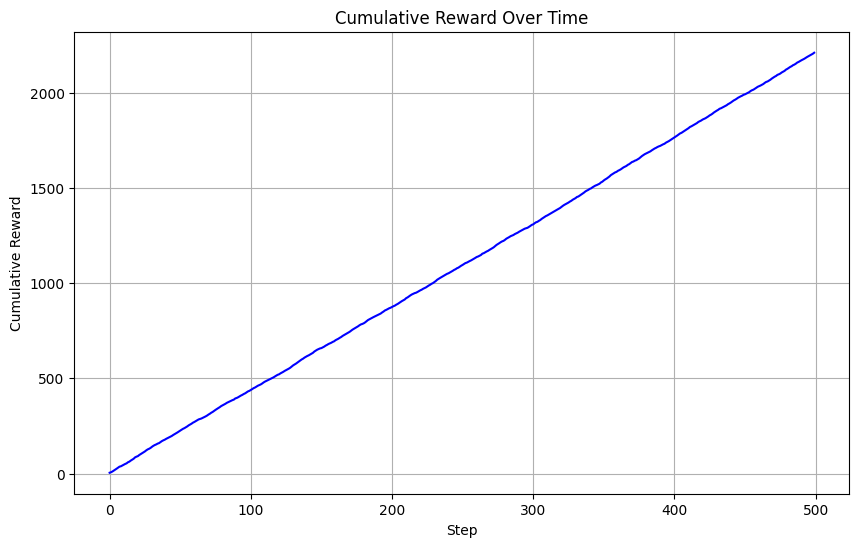

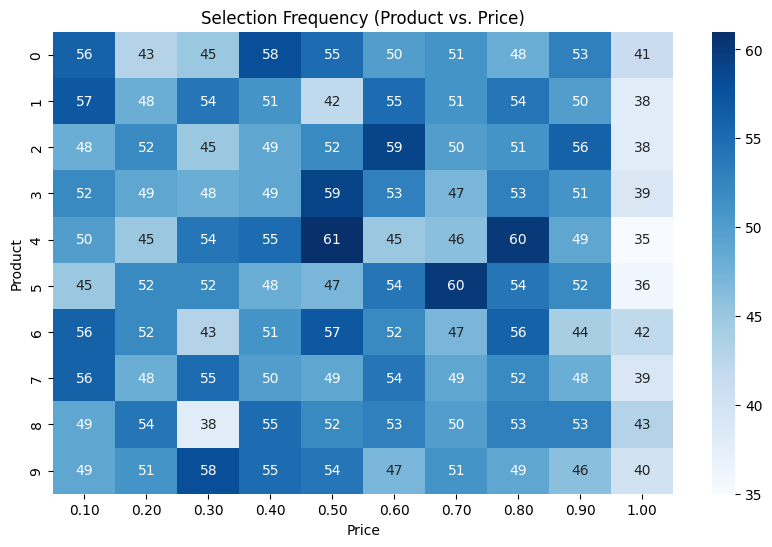

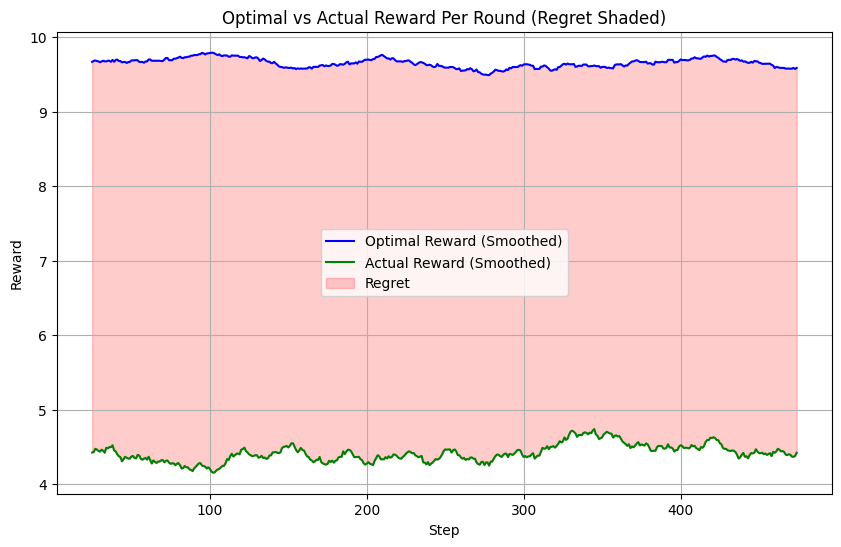

/Users/frain/Documents/GitHub/ola-proj-2425/project_work/plotting.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


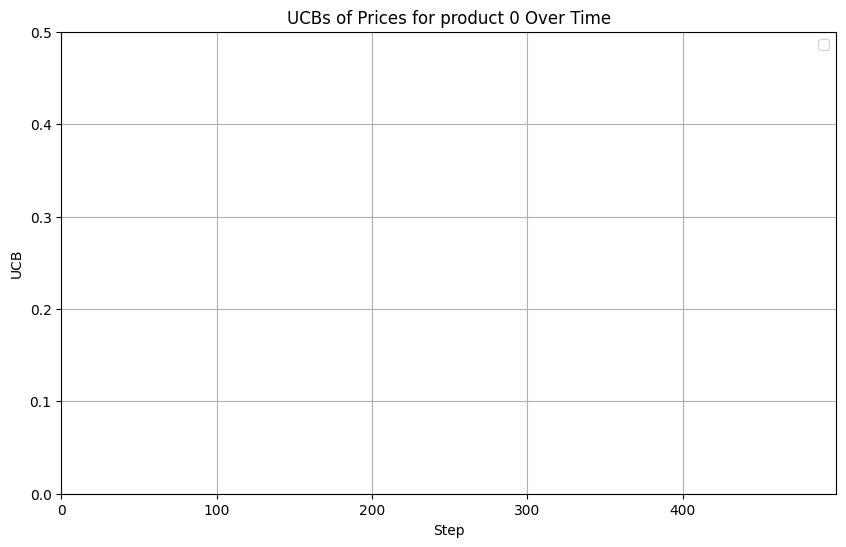

In [5]:
plot_environment_results(env)

## Performance Comparison

Compare the performance of both algorithms in their respective optimal environments.

📊 PERFORMANCE COMPARISON
REQUIREMENT 2 (Multiple products + Combinatorial-UCB):
  Expected behavior: Sublinear regret O(√T log T)

Inventory Constraint: ON
  Final cumulative regret: 2628.00
  Average regret per round: 5.256
  Efficiency vs optimal: 45.5%

Inventory Constraint: OFF
  Final cumulative regret: 2616.10
  Average regret per round: 5.232
  Efficiency vs optimal: 45.8%


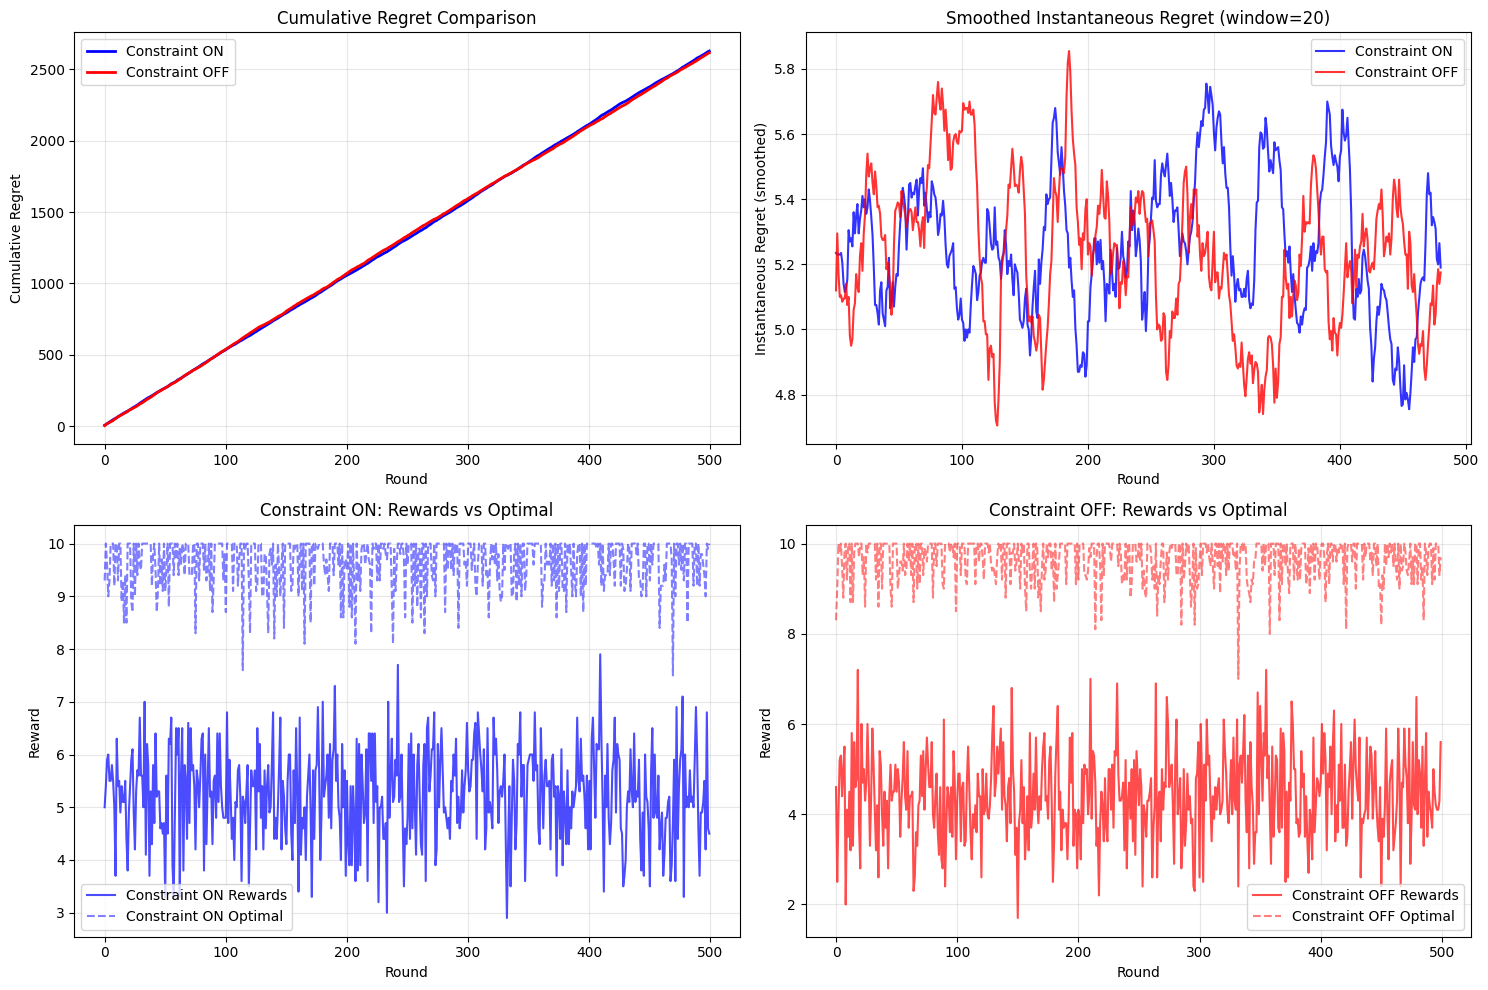


🎯 PROJECT COMPLIANCE SUMMARY:
✅ Constraint ON: Multiple products + Combinatorial-UCB (efficiency: 45.5%)
✅ Constraint OFF: Single product + Primal-dual (efficiency: 45.8%)
Both algorithms successfully implement their respective project requirements.


In [6]:
# 📊 Performance Comparison
print("📊 PERFORMANCE COMPARISON")
print("=" * 50)

# Calculate comprehensive metrics
req2_efficiency = (np.sum(constraint_rewards) / np.sum(constraint_optimals)) * 100
req3_efficiency = (np.sum(noconstraint_rewards) / np.sum(noconstraint_optimals)) * 100

print(f"REQUIREMENT 2 (Multiple products + Combinatorial-UCB):")
print(f"  Expected behavior: Sublinear regret O(√T log T)")

print("\nInventory Constraint: ON")
print(f"  Final cumulative regret: {constraint_cum_regret[-1]:.2f}")
print(f"  Average regret per round: {constraint_cum_regret[-1]/len(constraint_cum_regret):.3f}")
print(f"  Efficiency vs optimal: {req2_efficiency:.1f}%")

print(f"\nInventory Constraint: OFF")
print(f"  Final cumulative regret: {noconstraint_cum_regret[-1]:.2f}")
print(f"  Average regret per round: {noconstraint_cum_regret[-1]/len(noconstraint_cum_regret):.3f}")
print(f"  Efficiency vs optimal: {req3_efficiency:.1f}%")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Cumulative regret comparison
ax1.plot(constraint_cum_regret, label='Constraint ON', color='blue', linewidth=2)
ax1.plot(noconstraint_cum_regret, label='Constraint OFF', color='red', linewidth=2)
ax1.set_xlabel('Round')
ax1.set_ylabel('Cumulative Regret')
ax1.set_title('Cumulative Regret Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Instantaneous regret (smoothed)
window = 20
constraint_smooth = np.convolve(constraint_regrets, np.ones(window)/window, mode='valid')
noconstraint_smooth = np.convolve(noconstraint_regrets, np.ones(window)/window, mode='valid')

ax2.plot(constraint_smooth, label='Constraint ON', color='blue', alpha=0.8)
ax2.plot(noconstraint_smooth, label='Constraint OFF', color='red', alpha=0.8)
ax2.set_xlabel('Round')
ax2.set_ylabel('Instantaneous Regret (smoothed)')
ax2.set_title(f'Smoothed Instantaneous Regret (window={window})')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Constraint ON rewards
ax3.plot(constraint_regrets, label='Constraint ON Rewards', color='blue', alpha=0.7)
ax3.plot(constraint_optimals, label='Constraint ON Optimal', color='blue', linestyle='--', alpha=0.5)
ax3.set_xlabel('Round')
ax3.set_ylabel('Reward')
ax3.set_title('Constraint ON: Rewards vs Optimal')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Requirement 3 rewards
ax4.plot(noconstraint_rewards, label='Constraint OFF Rewards', color='red', alpha=0.7)
ax4.plot(noconstraint_optimals, label='Constraint OFF Optimal', color='red', linestyle='--', alpha=0.5)
ax4.set_xlabel('Round')
ax4.set_ylabel('Reward')
ax4.set_title('Constraint OFF: Rewards vs Optimal')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 PROJECT COMPLIANCE SUMMARY:")
print(f"✅ Constraint ON: Multiple products + Combinatorial-UCB (efficiency: {req2_efficiency:.1f}%)")
print(f"✅ Constraint OFF: Single product + Primal-dual (efficiency: {req3_efficiency:.1f}%)")
print(f"Both algorithms successfully implement their respective project requirements.")